In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# read the results
t = np.loadtxt('episodes_X axis.csv', delimiter=',')
rewards_gtg_1000_500 = np.loadtxt('rewards_go_to_goal_LSTM.csv', delimiter=',')
rewards_gtg_1000_500_CNN = np.loadtxt('rewards_go_to_goal_CNN.csv', delimiter=',')
rewards_gtg_1000_500_DNN = np.loadtxt('rewards_go_to_goal_DNN.csv', delimiter=',')

In [3]:
# Color setup and average function
RGB = 256
# blue
royalblue = (65/RGB,105/RGB,225/RGB)
dodgerblue = (30/RGB,144/RGB,255/RGB)
# green
green = (0/RGB,128/RGB,0/RGB)
# purple
darkorchid = (104/RGB,34/RGB,139/RGB)
# red & pink
coral = (205/RGB,91/RGB,69/RGB)
red = (139/RGB,0/RGB,0/RGB)
pink = (252/RGB,20/RGB,201/RGB)
orange = (255/RGB,128/RGB,0/RGB)

def cumsum_sma(array, period):
    ret = np.cumsum(array, dtype=float)
    ret[period:] = ret[period:] - ret[:-period]
    return ret[period - 1:] / period

In [4]:
period = 50
t_ = cumsum_sma(t,period)
rewards_gtg_1000_500_ = cumsum_sma(rewards_gtg_1000_500,period)
rewards_gtg_1000_500_CNN_ = cumsum_sma(rewards_gtg_1000_500_CNN,period)
rewards_gtg_1000_500_DNN_ = cumsum_sma(rewards_gtg_1000_500_DNN,period)

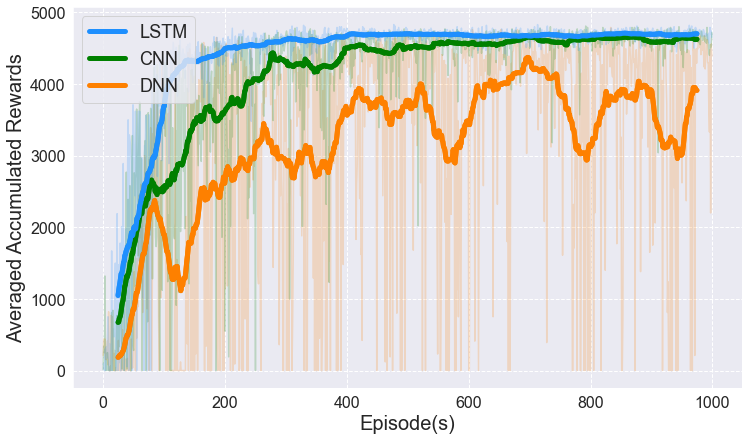

In [6]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_xlabel('Episode(s)', fontsize=20) 
ax.set_ylabel('Averaged Accumulated Rewards', fontsize=20) 

# We change the fontsize of ticks label 
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)

sns.set_style("darkgrid")
################################################################################
sns.lineplot(x = t_, y = rewards_gtg_1000_500_, color=dodgerblue, linewidth=5, label='LSTM')
sns.lineplot(x = t_, y = rewards_gtg_1000_500_CNN_, color=green, linewidth=5, label='CNN')
sns.lineplot(x = t_, y = rewards_gtg_1000_500_DNN_, color=orange, linewidth=5, label='DNN')
#========================================================================================
sns.lineplot(x = t, y = rewards_gtg_1000_500_DNN, color=orange, alpha=0.2)
sns.lineplot(x = t, y = rewards_gtg_1000_500_CNN, color=green, alpha=0.2)
sns.lineplot(x = t, y = rewards_gtg_1000_500, color=dodgerblue, alpha=0.2)
#========================================================================================
sns.lineplot(x = t_, y = rewards_gtg_1000_500_DNN_, color=orange, linewidth=5, label='DNN')
sns.lineplot(x = t_, y = rewards_gtg_1000_500_CNN_, color=green, linewidth=5, label='CNN')
sns.lineplot(x = t_, y = rewards_gtg_1000_500_, color=dodgerblue, linewidth=5, label='LSTM')
################################################################################

plt.legend(fontsize=18, loc='upper left', labels=['LSTM','CNN','DNN']) #,title='500 steps',title_fontsize=14)

plt.grid(color = 'white', linestyle = '--', linewidth = 1)
plt.show()
#sns.move_legend(ax, loc='upper left', frameon=False)